Importing modules

In [165]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import Ridge
from wordcloud import WordCloud
import squarify
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


Loading data

In [8]:
df = pd.read_csv("cars.csv")

It seems that some of the results are missing or with wrong datas. Dropping them and leaving only Diesel, Gasoline, Petrol/Gas.


In [9]:
df['fuel_type'].unique()

array(['Diesel', 'Gasoline', 'Petrol / Gas', nan, '2018 y', '2017 y',
       '2019 y', '2020 y', 'Ethanol'], dtype=object)

In [10]:
valid_fuel_types = ['Diesel', 'Gasoline', 'Petrol / Gas']
df = df[df['fuel_type'].isin(valid_fuel_types)]
df['fuel_type'].unique()

array(['Diesel', 'Gasoline', 'Petrol / Gas'], dtype=object)

Checking "liter" column and removing invalid values.

In [11]:
df['liter'].unique()

array(['2.0', '1.6', '1.8', '3.0', '3.2', '1.9', '2.7', '2.2', '2.5',
       '2.8', '1.3', '4.0', '2.3', '2.9', '1.7', '1.0', '5.2', '2.4',
       '6.8', '3.5', '1.2', '1.4', '50.', '2.1', '1.5', '4.3', '4.2',
       '27.', '4.6', '3.7', '1.1', '35.', '1 m', '3.6', '10 ', '6.3',
       '0.7', '1 0', '5.7', '3.3', '4.4', '2.6', '3.8', '0.3', '14.',
       '0.6', '0.2', '19.', '0.8', '0.1', '3 0', '3.4', '3.1', '5.0',
       '4.7', '0.9', '9 k', '62 ', '8.0', '3.9', '2 0', '281', '4.9',
       '4.8', '5.5', '73 ', '5 0', '2 m', '4.5', '152', '4.1', '0.4',
       '5.6', '173', '9.0', '20 ', '355', '8.2', '0.5', '5.8', '6.5',
       '6.0', '5.4', '3 m', '112', '94 ', '110', '16 ', '100', '116',
       '150', '6.2', '132', 'New', '44 ', '6 0', '5 k', '50 ', '53 ',
       '40 '], dtype=object)

In [12]:
 
df['liter'] = pd.to_numeric(df['liter'], errors='coerce') #Checking if there's any words in numeric column and converting them to NaN
df.dropna(subset=['liter'], inplace=True) #Dropping NaN data.
df = df[df['liter']<=10] # Dropping if liter is more than 10.
df['liter'].unique() 

array([ 2. ,  1.6,  1.8,  3. ,  3.2,  1.9,  2.7,  2.2,  2.5,  2.8,  1.3,
        4. ,  2.3,  2.9,  1.7,  1. ,  5.2,  2.4,  6.8,  3.5,  1.2,  1.4,
        2.1,  1.5,  4.3,  4.2,  4.6,  3.7,  1.1,  3.6, 10. ,  6.3,  0.7,
        5.7,  3.3,  4.4,  2.6,  3.8,  0.3,  0.6,  0.2,  0.8,  0.1,  3.4,
        3.1,  5. ,  4.7,  0.9,  8. ,  3.9,  4.9,  4.8,  5.5,  4.5,  4.1,
        0.4,  5.6,  9. ,  8.2,  0.5,  5.8,  6.5,  6. ,  5.4,  6.2])

Cleaning city data

In [13]:

df['city'].unique()

array(['Marijampole', 'Klaipeda', 'Siauliai', 'Kaunas', 'Pasvalys',
       'Vilnius', 'Panevezys', 'Utena', 'Talinas', 'Taurage', 'Jonava',
       'Jurbarkas', 'Moletai', 'Radviliskis', 'Alytus', 'Silute',
       'Ukmerge', 'Prienai', 'Visaginas', 'Rokiskis', 'Vilkaviskis',
       'Telsiai', 'Silale', 'Kretinga', 'Kedainiai', 'Pakruojis',
       'Sirvintos', 'Druskininkai', 'Rietavas', 'Plunge', 'Kupiskis',
       'Joniskis', 'Gargzdai', 'Kursenai', 'Salcininkai', 'Kazlu Ruda',
       'Mazeikiai', 'Trakai', 'Svencionys', 'Lentvaris', 'Zarasai',
       'Anyksciai', 'Vievis', 'Birzai', 'Kaisiadorys', 'Raseiniai',
       'Kelme', 'Palanga', 'Ariogala', 'Akmene', 'Birstonas', 'Varena',
       'Skuodas', 'Sakiai', 'Other city', 'Ignalina', 'Kalvarija',
       'Czech Republic', 'Naujoji Akmene', 'Elektrenai', 'Pagegiai',
       'Lazdijai', 'Norway', 'Ryga', 'Stokholmas', 'Hanover',
       'Commercial auto (with box', 'SUV', 'Heavy minibus', 'Wagon',
       'Hatchback', 'Van', 'Sedan', 'Daugp

In [14]:
#Creating list for valid city names
valid_city_names = ['Marijampole', 'Klaipeda', 'Kaunas', 'Vilnius', 'Siauliai', 'Panevezys', 'Utena', 'Talinas', 'Taurage', 'Jonava', 'Jurbarkas', 'Moletai', 'Radviliskis', 'Silute', 'Ukmerge', 'Alytus', 'Vilkaviskis', 'Telsiai', 'Silale', 'Kretinga', 'Kedainiai', 'Pakruojis', 'Sirvintos', 'Rietavas', 'Plunge', 'Kupiskis', 'Gargzdai', 'Druskininkai', 'Salcininkai', 'Kazlu Ruda', 'Pasvalys', 'Mazeikiai', 'Trakai', 'Svencionys', 'Joniskis', 'Kursenai', 'Rokiskis', 'Prienai', 'Vievis', 'Anyksciai', 'Kaisiadorys', 'Raseiniai', 'Kelme', 'Palanga', 'Ariogala', 'Birzai', 'Birstonas', 'Varena', 'Skuodas', 'Zarasai', 'Sakiai', 'Kalvarija', 'Visaginas', 'Czech Republic', 'Ignalina', 'Akmene', 'Elektrenai', 'Lentvaris', 'Norway', 'Naujoji Akmene', 'Lazdijai', 'Stokholmas', 'Hanover', 'Ryga']
mask = df['city'].isin(valid_city_names) 
df = df[mask] #If city does not contain what's in valid_city_names it get's dropped.
df['city'].unique() #Seems like data is OK now.

array(['Marijampole', 'Klaipeda', 'Siauliai', 'Kaunas', 'Pasvalys',
       'Vilnius', 'Panevezys', 'Utena', 'Talinas', 'Taurage', 'Jonava',
       'Jurbarkas', 'Moletai', 'Radviliskis', 'Alytus', 'Silute',
       'Ukmerge', 'Prienai', 'Visaginas', 'Rokiskis', 'Vilkaviskis',
       'Telsiai', 'Silale', 'Kretinga', 'Kedainiai', 'Pakruojis',
       'Sirvintos', 'Druskininkai', 'Rietavas', 'Plunge', 'Kupiskis',
       'Joniskis', 'Gargzdai', 'Kursenai', 'Salcininkai', 'Kazlu Ruda',
       'Mazeikiai', 'Trakai', 'Svencionys', 'Lentvaris', 'Zarasai',
       'Anyksciai', 'Vievis', 'Birzai', 'Kaisiadorys', 'Raseiniai',
       'Kelme', 'Palanga', 'Ariogala', 'Akmene', 'Birstonas', 'Varena',
       'Skuodas', 'Sakiai', 'Ignalina', 'Kalvarija', 'Czech Republic',
       'Naujoji Akmene', 'Elektrenai', 'Lazdijai', 'Norway', 'Ryga',
       'Stokholmas', 'Hanover'], dtype=object)

Title, price and transmission data will always be correct as i've used better scraping methods to scrape them.


In [15]:
df['price'].unique()
df['title'].unique()
df['transmission'].unique()

array(['Automatic', 'Mechanical'], dtype=object)

After cleaning data, we have 8975 results left. (Out of 9455)

In [16]:
df.info() #Check current data stats
df.head() #print first 5 results
#Exporting data to a new file.
df.to_csv("cars_clean.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8975 entries, 0 to 9454
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8975 non-null   object 
 1   price         8975 non-null   int64  
 2   liter         8975 non-null   float64
 3   fuel_type     8975 non-null   object 
 4   year          8975 non-null   object 
 5   transmission  8975 non-null   object 
 6   city          8975 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 560.9+ KB


,title,price,liter,fuel_type,year,transmission,city
0,Audi A4,3450,2.0,Diesel,2006,Automatic,Marijampole
1,Opel Zafira,3750,1.6,Gasoline,2009,Mechanical,Marijampole
2,Opel Meriva,1950,1.8,Gasoline,2004,Automatic,Klaipeda
3,Audi A6,3050,3.0,Diesel,2006,Automatic,Siauliai
4,Volkswagen Phaeton,2790,3.2,Petrol / Gas,2003,Automatic,Kaunas


Data Analysis, loading new clean cars list

In [44]:
data = pd.read_csv("cars_clean.csv") 

We can see from the bar chart that diesel engines are most commonly used:

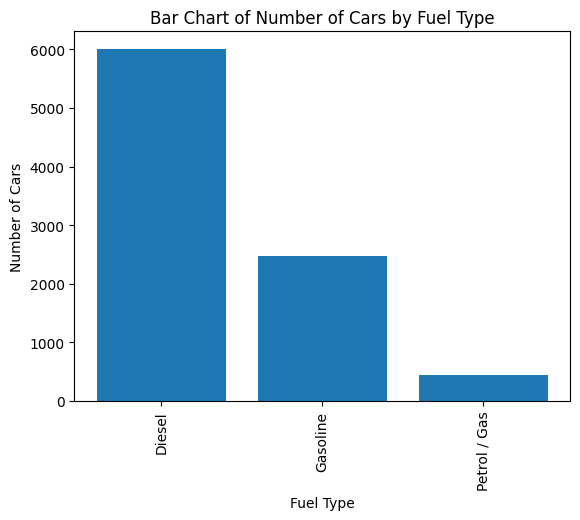

In [ ]:

fuel_types = data["fuel_type"].value_counts()
plt.bar(fuel_types.index, fuel_types.values)
plt.xlabel("Fuel Type")
plt.ylabel("Number of Cars")
plt.title("Bar Chart of Number of Cars by Fuel Type")
plt.xticks(rotation=90)
plt.show()

Avarage car price over the years

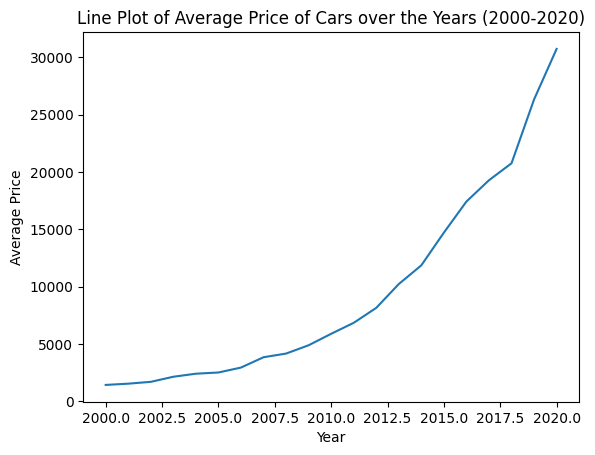

In [ ]:
price_by_year = data[(data['year'] >= 2000) & (data['year'] <= 2020)].groupby("year")["price"].mean()
plt.plot(price_by_year.index, price_by_year.values)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Line Plot of Average Price of Cars over the Years (2000-2020)")
plt.show()

We can see from the heatmap that newer cars have lower engine liters, because they weigh less and require less energy to move. Also that the price increse over years.

C:\Users\user\AppData\Local\Temp\ipykernel_19436\3927826303.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


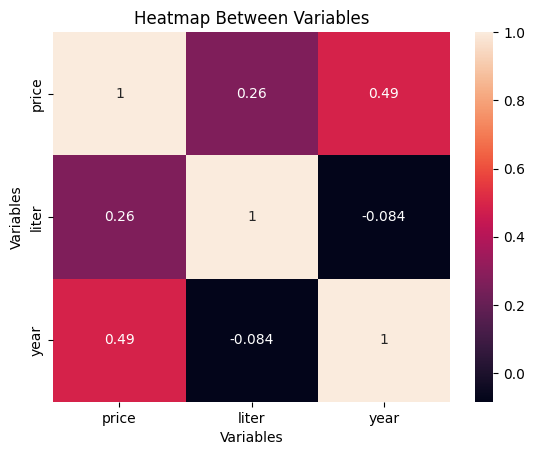

In [15]:
sns.heatmap(data.corr(), annot=True)
plt.xlabel("Variables")
plt.ylabel("Variables")
plt.title("Heatmap Between Variables")
plt.show()

Wordcloud of the most commonly used words.

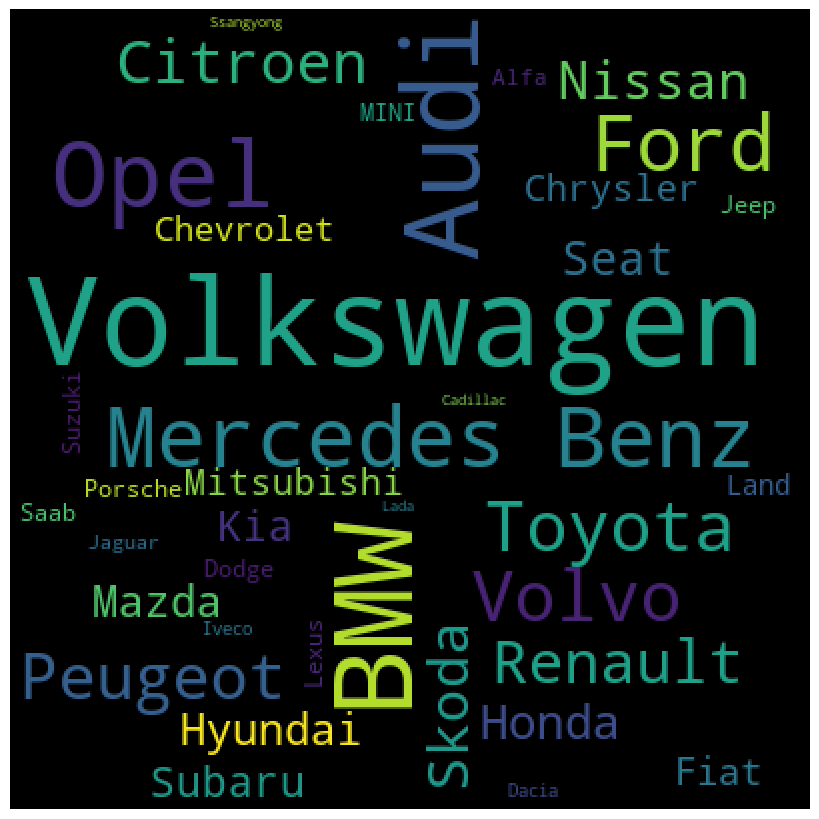

In [ ]:
# Create a list of the first words of each title, as the title contains integers too.
first_words = [title.split()[0] for title in data["title"]]

# Create the word cloud
wordcloud = WordCloud(width=400, height=400, min_font_size=7).generate(" ".join(first_words))

# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Below is a more detailed pie chart showing the top 20 most popular cars. The most popular selling car is Volkswagen with 16.7%, followed by BMW with 12.7%, and Audi with 11.6%.

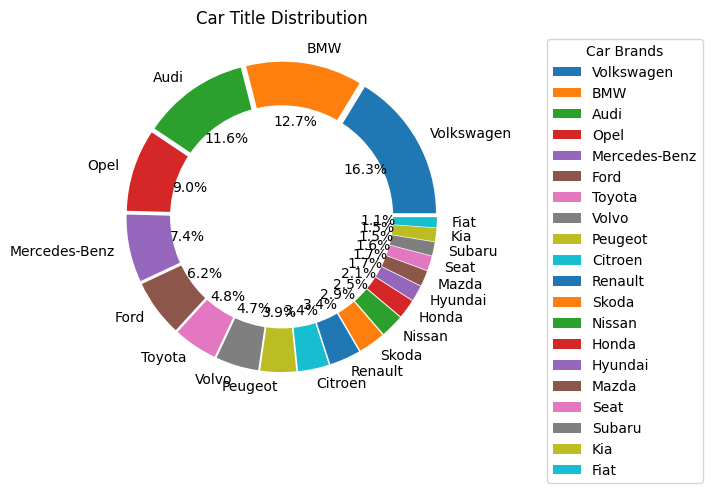

In [25]:
titles = data['title']

# Create a dictionary to count the occurrences of each car title
car_titles = {}
for title in titles:
    first_word = title.split()[0]
    if first_word in car_titles:
        car_titles[first_word] += 1
    else:
        car_titles[first_word] = 1

# Sort the dictionary by value and take the first 20 elements
car_titles = dict(sorted(car_titles.items(), key=lambda item: item[1], reverse=True)[:20])

# Extract the labels (car titles) and values (counts) from the dictionary
labels = list(car_titles.keys())
values = list(car_titles.values())

# Create the donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=[0.05 for _ in range(len(labels))])

# Add a white circle in the center of the chart
center_circle = plt.Circle((0,0),0.75,color='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Add a title
plt.title("Car Title Distribution")

# Add the legend
plt.legend(title="Car Brands", bbox_to_anchor=(1.2, 1))

# Show the chart
plt.show()

Top 10 cities that has most of the cars

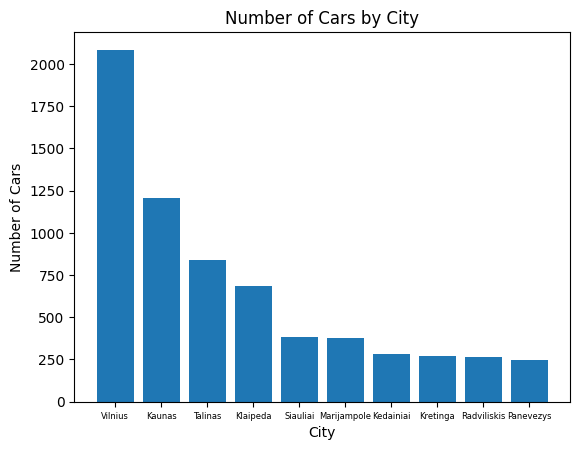

In [62]:
city_counts = data.groupby('city').size().reset_index(name='counts')

# Sort the cities by the number of cars in descending order
city_counts = city_counts.sort_values(by='counts', ascending=False)

# Select the top 10 cities
top_cities = city_counts.head(10)

# Extract the city names and counts into separate lists
cities = top_cities['city']
counts = top_cities['counts']
plt.tick_params(axis='x', labelsize=6)
# Create the bar chart
plt.bar(cities, counts)
plt.xlabel('City')
plt.ylabel('Number of Cars')
plt.title('Number of Cars by City')

# Display the chart
plt.show()

Top 20 cities by average car price. According to our data, the average price in Vilnius is about 10k, while in the others the average price is only around 5k.

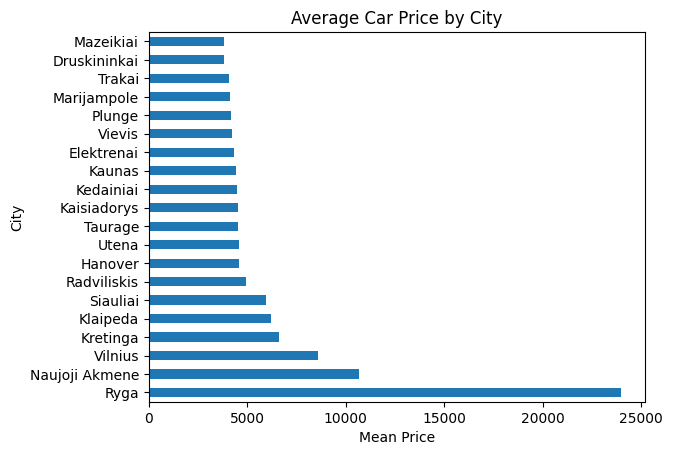

In [63]:
mean_price_per_city = data.groupby('city')['price'].mean().reset_index(name='mean_price')
top_20_cities = mean_price_per_city.sort_values(by='mean_price', ascending=False).head(20)
top_20_cities.plot(kind='barh', x='city', y='mean_price', legend=False)
plt.xlabel('Mean Price')
plt.ylabel('City')
plt.title('Average Car Price by City')
plt.yticks(rotation=0)
plt.show()

Treemap of the car brands. (The bigger the tile, the more expensive it is) We can see that Ferrari, Bentley and Porchse is the most expensive ones.

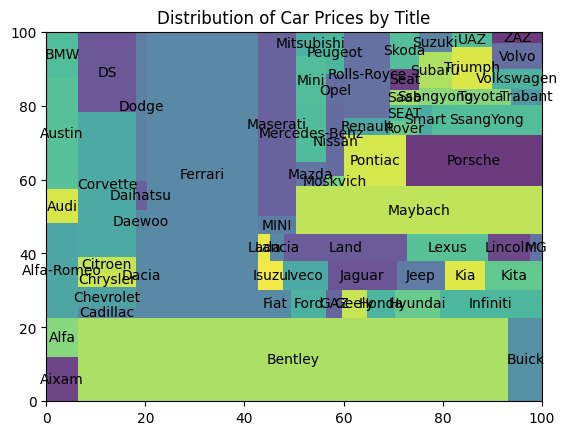

In [68]:

data['title'] = data['title'].str.split().str[0]

mean_price_per_title = data.groupby('title')['price'].mean().reset_index()

# Create the treemap
squarify.plot(sizes=mean_price_per_title['price'], label=mean_price_per_title['title'], alpha=.8 )
plt.title("Distribution of Car Prices by Title")
plt.show()

An average price for a car based on its transmission. The cost of automatic transmissions is much higher.

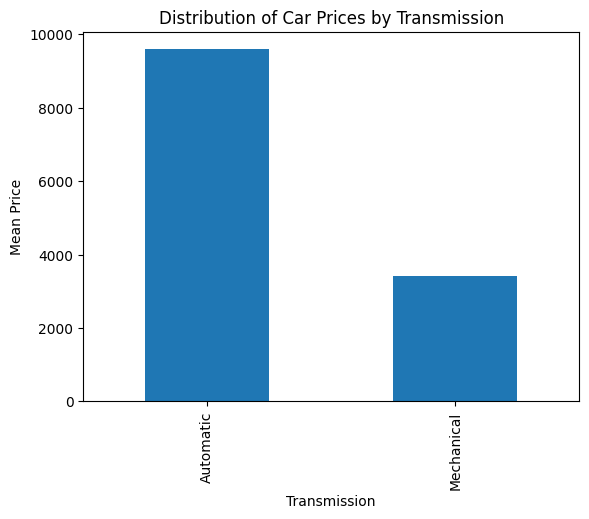

In [70]:
transmission_group = data.groupby('transmission')

# Calculate the mean price for each transmission type
mean_price_by_transmission = transmission_group['price'].mean().reset_index()

# Create a bar chart to visualize the distribution of prices by transmission type
mean_price_by_transmission.plot(kind='bar', x='transmission', y='price', legend=False)
plt.xlabel('Transmission')
plt.ylabel('Mean Price')
plt.title('Distribution of Car Prices by Transmission')

# Display the chart
plt.show()

But in this pie chart, we can see that Mechanical transmissions are more used.

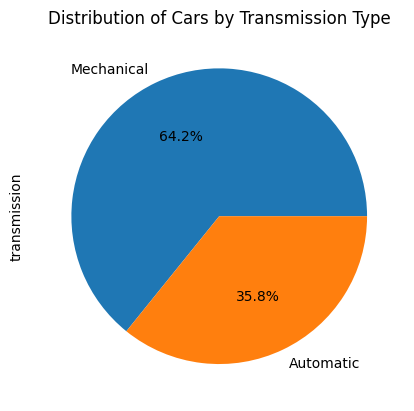

In [71]:
transmission_counts = data['transmission'].value_counts()

# Create a pie chart to visualize the distribution of cars by transmission type
transmission_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Cars by Transmission Type')

# Display the chart
plt.show()

In [154]:
data = pd.read_csv("cars_clean.csv") 

Creating numeric dummies

In [156]:
df1 = pd.get_dummies(df, columns=['fuel_type', 'transmission', 'city'])

Values

In [159]:
X = data.drop([ 'title', 'price'], axis=1)
y = data[ 'price']

Checking shapes

In [160]:
print("Shape of x is: ",X. shape)
print("Shape of y is: ", y. shape)

Shape of x is:  (8908, 5)
Shape of y is:  (8908,)


Pipeline

In [157]:
# Logistic Regression pipeline
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

# Random Forest pipeline
forest_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

# Decision Tree pipeline
tree_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

Splitting dataset in to 70% training and 30% testing

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Re-checking shapes

In [162]:
print("X_test shape: ", X_test. shape)
print ("X_train shape:", X_train. shape)
print("y_test shape: ", y_test.shape)
print("y_train shape: ", y_train. shape)

X_test shape:  (2673, 5)
X_train shape: (6235, 5)
y_test shape:  (2673,)
y_train shape:  (6235,)


In [166]:
scaler = StandardScaler()

In [168]:
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform (X_test)

ValueError: could not convert string to float: 'Diesel'

In [169]:
model = LinearRegression()

In [170]:
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Diesel'

In [172]:
df1.head()

,title,price,liter,year,fuel_type_Diesel,fuel_type_Gasoline,fuel_type_Petrol / Gas,transmission_Automatic,transmission_Mechanical,city_Akmene,...,city_Telsiai,city_Trakai,city_Ukmerge,city_Utena,city_Varena,city_Vievis,city_Vilkaviskis,city_Vilnius,city_Visaginas,city_Zarasai
0,Audi A4,3450,2.0,2006,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Opel Zafira,3750,1.6,2009,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Opel Meriva,1950,1.8,2004,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Audi A6,3050,3.0,2006,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Volkswagen Phaeton,2790,3.2,2003,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
